# Compress Fingerprint data using PCA

### Get a monochrome Fingerprint image from google image search and read it.

In [1]:
from PIL import Image
import urllib
from StringIO import StringIO
img=Image.open(StringIO(urllib.urlopen('https://people.sc.fsu.edu/~jburkardt/m_src/svd_fingerprint/fingerprint_01.png').read()))


ModuleNotFoundError: No module named 'StringIO'

### Show the image using matplotlib.

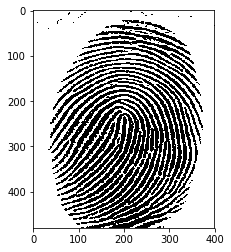

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)

### Convert the image to data for black(0) and white(255) and make it numpy array

In [4]:
im=img.convert('L')
import numpy 
import numpy as np
imdata=np.asarray(im)
print "Shape of array is ", numpy.shape(imdata)

Shape of array is  (480, 400)


### Check the array by reconverting to image.

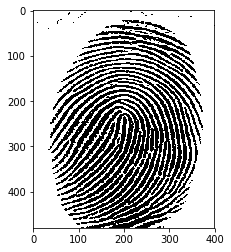

In [5]:
plt.imshow(Image.fromarray(imdata).convert('1'))

### Perform SVD analysis on the Fingerprint array.
#### Question: How many PCs do you expect?

In [6]:
u,s,v=np.linalg.svd(imdata)

In [7]:
print np.shape(u)
print np.shape(s)
print np.shape(v)

(480, 480)
(400,)
(400, 400)


#### Question: How many PCs are good for approximation the original data?
### Plot the percentage of variance explained by each PC.


In [9]:
S=np.diag(s)        # s is 1d, this is how numpy reports s, np.diag makes it a size(s)*size(s) matrix with s as diagnol
var_or_eig=S.T.dot(S)  # this is nothing but eigen values of covariance matrix
var1d=np.diag(var_or_eig)     # to make it 1d from diagnol matrix, all other elements are zeors
var1dpct=var1d*100.0/sum(var1d)  #compute variance as percent

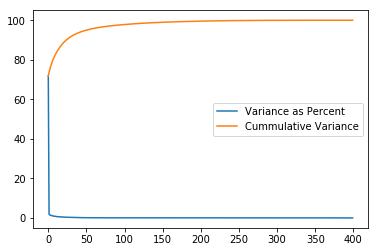

In [10]:
plt.plot(var1dpct,label="Variance as Percent")
plt.plot(var1dpct.cumsum(),label="Cummulative Variance")
plt.legend()

#### Looks like first few PCs contain most variance of the data.

## Reconstruct data from PCs
### 1. Using 2 PCs to reconstruct the data

In [11]:
img_data_2PC=u[:,0:2].dot(S[0:2,0:2]).dot(v[0:2,:])

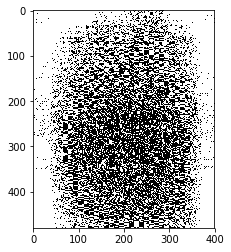

In [12]:
plt.imshow(Image.fromarray(img_data_2PC).convert('1'))

### 2. Using 10 PCs to reconstruct the data.

In [13]:
img_data_10PC=u[:,0:10].dot(S[0:10,0:10]).dot(v[0:10,:])

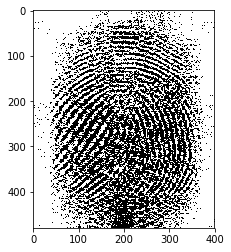

In [14]:
plt.imshow(Image.fromarray(img_data_10PC).convert('1'))

## Questions:

### 1.  Assuming 10 PCs are enough to approximate this finger print data, how much percent reduction in data did you achieve by storing output from SVD analysis? [you might have cracked how relavent authorities store your biometric information]
### 2. Explain why this data compression method is a lossy compression?
### 3. In this example numpy function svd was used, now use covariance/correlation matrix to compute PCs. Compare the  time taken by svd function method and covariance method by using IPython magic %%timeit.
### 3. What happens when you rotate the fingerprint image by 90 degrees? Notice the time taken by svd function in this case.
### 3. Try SVD for a colored RGB image. [Hint: Take R, G, B values as columns]. 